## 3-3 비모수적 모델


### 1. 의사결정나무(Decision Tree)

#### 의사결정나무

- 데이터를 단계적인 분기(Split)에 따라 예측하는 트리(나무) 구조의 모델

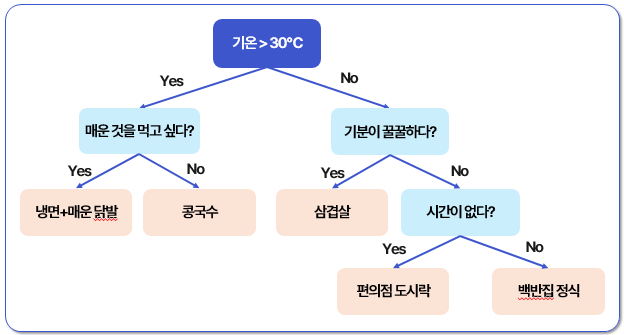

#### 구성요소

- 내부 노드(Internal Node): 분기 조건을 지닌 노드
- 루트 노드(Root Node): 최상위 내부 노드
- 가지(Branch): 노드와 노드의 연결 관계
- 리프 노드(Leaf Node): 최종 예측 결과를 지닌 노드

#### 학습: 재귀적 분할(Recursive Splitting) 기반

- 학습 시작: 분기(전체데이터)
- 욕심쟁이(Greedy) 알고리즘으로 최적의 구조를 갖는 나무를 학습하는 것은 보장되지 않음
- 분기(Splitting)

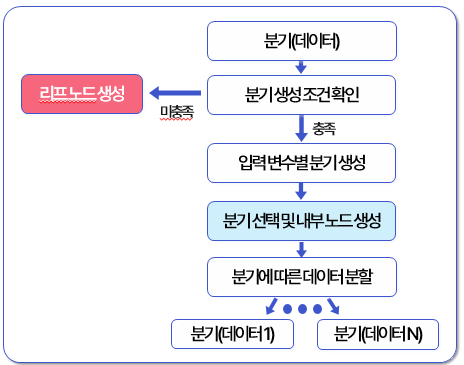

#### 학습: 사전 가지치기(Pruning)

- 사전 가지치기: 나무의 복잡도를 분기 생성 이전에 제한

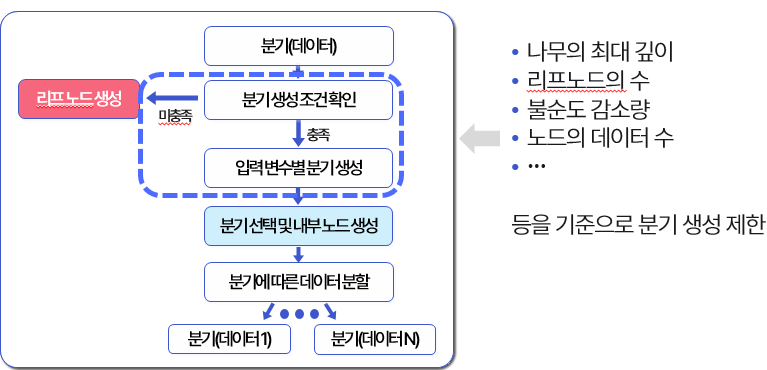

#### 학습: 분기 선택 기준(Criterion)

- 불순도 감소량(Impurity Reduction)

> $\Delta I = I - \sum_{k=1}^{K} \frac{N_k}{N} I_k$
>
>$I$:노드의데이터의 불순도 $N$:데이터수 $K$:분기의수
>
>$N_k$:k분기에해당하는데이터수 $I_k$:k분기에해당하는데이터의불순도

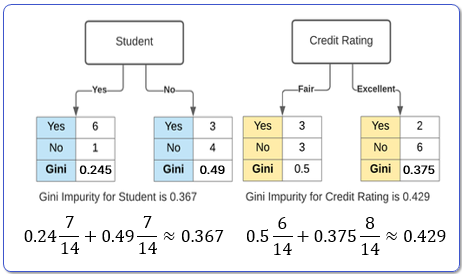

- 카이 제곱검정의 p-value
- 분산분석(ANOVA)의 p-value


#### 학습: 분기 선택 기준(Criterion)

- 분류(Classification)

> 민감도: 지니 불순도 < 엔트로피
>
> ▷ 엔트로피가 지니 불순도에 비해 과적합 위험이 큼

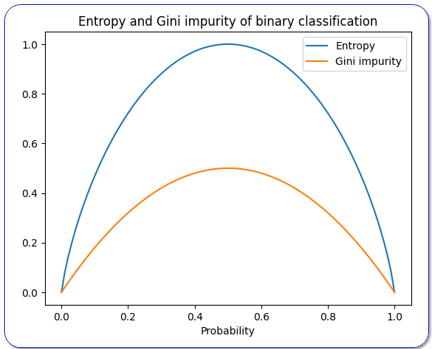

- 회귀(Regression)

| | 평균제곱오차<br>(Mean Squared Error) | 평균절대오차<br>(Mean Absolute Error) |
|---|---|---|
| 수식 | $\frac{1}{n}\sum_{i=1}^{n} (y_i - \bar{y})^2$<br>$\bar{y}$: 평균 | $\frac{1}{n}\sum_{i=1}^{n} \vert y_i - \bar{y} \vert$<br>$\bar{y}$: 중양값 |
| 특징 | 계산이 단순<br>이상치에 영향을 많이 받음 | 계산이 복잡<br>이상치에 영향을 덜 받음 |

#### 학습: 분기의 생성

|   | 이지 분리<br/>(Binary Split) | 다지 분리<br/>(Multi-Way Split) |
| --- | --- | --- |
| 의미 | 두 개의 가지 생성 | 이상의 가지 생성 |
| 분기 조건 |   | 각 범주마다 분기 생성 |
| 트리 깊이 | 깊어짐 | 얕아짐 |
| 과적합 위험 | 보다 유연하게 대응이 가능 | 범주의 수가 많을 때 심해짐 |
| 연속형 변수 | 정렬 후 인접한 값들과의 중간값 중에서<br/>불순도 감소폭이 가장 큰 값을 기준으로 분리 | 구간화가 쉽지 않아<br/>거의 사용되지 않음 |


#### 학습: 나무의 성장 방식


|   | 레벨(깊이)기준 나무 성장<br/>(Level(Depth)-Wise /Breadth-First Tree Growth) | 성능 기준 나무 성장<br/>(Leaf-Wise / Best(Depth)-First Tree Growth) |
| --- | --- | --- |
| 방식 |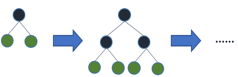|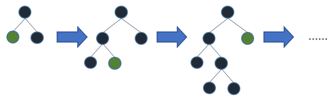|
| 특징 | 과적합 위험이 상대적으로 낮음<br/>병렬화 용이<br/>비효율적 노드의 생성 가능성이 높음 | 효율이 높은 나무를 생성<br/>과적합 위험이 상대적으로 높음<br/>병렬화가 어려움<br/>불균형 성장으로 인한 병목 현상이 생길 수 있음 |

- 출처: https://lightgbm.readthedocs.io/en/latest/Features.html

#### 학습: 가지치기(Pruning)

- 사후 가지치기(Post-Pruning): 학습 완료 후 리프 노드들을 분기 이전으로 돌렸을 때의 효율성과 비교하여

비용 복잡도 가지치기(Cost Complexity Pruning)

$R_{\alpha(T)} = R(T) + \alpha|T|$

$R(T)$:나무T의 총손실

$|T|$:나무T의 리프노드수

$\alpha$:복잡도제어계수

#### 종류

|   | ID3 | C4.5 | CHAID<br/>Chi-squared Automatic Interaction | CART<br/>Classification and Regression Tree |
| --- | --- | --- | --- | --- |
| 분기 | 다지 분기 | 다지 분기 | 지 분기 | 이지 분기 |
| 연속형 변수 처리 | 미지원 | 임계값 기준 분할 | 구간화 | 임계값 기준 분할 |
| 불순도 기준 | 정보 이득(Information Gain) | 정보 이득 비율(Gain Ratio) | 카이 제곱 통계량<br/>F 검정 통계량 | 지니 불순도 감소량<br/>정보 이득 |
| 지원 학습 유형 | 분류 | 분류 | 분류 및 회귀 | 분류 및 회귀 |
| 가지치기 | 지원 안 함 | 지원 | 지원 | 지원 |
| 결측값 처리 | 미지원 | 가능 | 가능 | 가능 |



#### 장단점

| 장점 | 단점 |
| --- | --- |
| 직관적 해석 가능성<br/>전처리 부담 낮음<br/>특성 선택 내재화 | 과적합이 쉽게 발생<br/>작은 변화에 민감<br/>고차원 및 복잡한 경계 표현 한계<br/>등장하지 않은 유형의 데이터에는 불안정적 |


### 2. K-최근접 이웃
- 예측할 데이터 포인트의 K 개의 이웃들의 대상 변수를 바탕으로 예측


#### Tie Breaking

- 분류 문제에서 이웃의 클래스 빈도에 동수가 존재할 때 해소법

> 가까운 이웃 우선
> 
> 임의 선택
> 
> 고정 순위 사용: 클래스 빈도, 클래스 명 사전순,...
> 
> 이진 분류인 경우 K 를 홀수로 설정


#### Ex) 분류
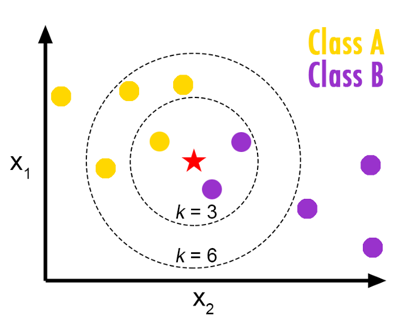

- K 가 3 이고 균일 분류일 때, Class B
- K 가 6 이고 균일 분류일 때, Class A

#### 특징
- 인스턴스 기반(Instance-Based): 학습 데이터 예측 시 활용
- Lazy Learning: 예측 시 학습 데이터와 연산을 통해 예측
- Local Generalization: 지역적 정보로 일반화

#### K 값에 따른 분산과 편향의 변화

| K 값 | 분산 | 편향 |
| --- | --- | --- |
| 작을수록 | 높다→ 데이터에 민감 | 낮다 |
| 높을수록 | 낮다 | 높다 → 세밀함 부족 |

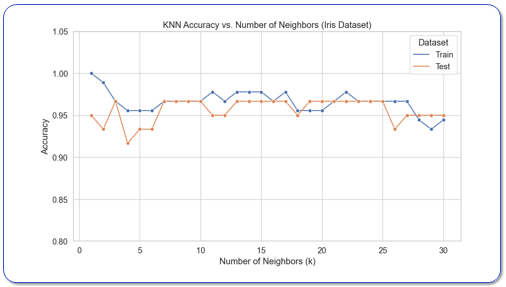

#### 장단점

| 장점 | 단점 |
| --- | --- |
| 직관적 이해<br/>비선형 패턴 학습 가능 | 차원 저주 현상에 취약<br/>스케일 민감성<br/>클래스 불균형에 취약<br/>학습 데이터 전체 저장 필요<br/>예측이 느림 |

#### 차원의 저주(Curse of Dimensionality)

- 데이터 밀도의 희박화
> 차원이 커질수록 최소 거리와 최장 거리의 비율이 1 에 수렴
- 거리 기반 판단의 무력화
> 결과의 신뢰도를 유지하기 위해 더 많은 데이터가 필요하게 됨
